In [146]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score, f1_score,confusion_matrix, mean_absolute_error , r2_score , mean_squared_error, mean_absolute_percentage_error, multilabel_confusion_matrix
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Reading DataSet**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/raw_data.csv')

In [ ]:
df.shape

(2130, 40)

**Dropping Irrelevant Columns**

In [ ]:
#Dropping null rows
df=df.drop(index=df.index[:1])
df=df.drop(index=df.index[-3:])

In [ ]:
# Dropping irrelevant columns like FileName,Date,SegFile,b,e,A,B,C,D,E,AD,DE,LD,FS,SUSP,CLASS,DR
df=df.drop(columns=["FileName","Date","SegFile","b","e","A","B","C","D","E","AD","DE","LD","FS","SUSP","CLASS","DR"])

In [ ]:
cols=["baseline_expert","baseline","accelerations","fetal_movement","uterine_contractions","abnormal_short_term_variability","mean_value_of_short_term_variability","percentage_of_time_with_abnormal_long_term_variability","mean_value_of_long_term_variability","light_decelerations","severe_decelerations","prolongued_decelerations", "histogram_width","histogram_min","histogram_max","histogram_number_of_peaks","histogram_number_of_zeroes","histogram_mode","histogram_mean","histogram_median","histogram_variance","histogram_tendency","fetal_health"]
df.columns=cols

In [ ]:
df

,baseline_expert,baseline,accelerations,fetal_movement,uterine_contractions,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,light_decelerations,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
1,120.0,120.0,0.0,0.0,0.0,73.0,0.5,43.0,2.4,0.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
2,132.0,132.0,4.0,0.0,4.0,17.0,2.1,0.0,10.4,2.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
3,133.0,133.0,2.0,0.0,5.0,16.0,2.1,0.0,13.4,2.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
4,134.0,134.0,2.0,0.0,6.0,16.0,2.4,0.0,23.0,2.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
5,132.0,132.0,4.0,0.0,5.0,16.0,2.4,0.0,19.9,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2122,140.0,140.0,0.0,0.0,6.0,79.0,0.2,25.0,7.2,0.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2123,140.0,140.0,1.0,0.0,9.0,78.0,0.4,22.0,7.1,0.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2124,140.0,140.0,1.0,0.0,7.0,79.0,0.4,20.0,6.1,0.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2125,140.0,140.0,1.0,0.0,9.0,78.0,0.4,27.0,7.0,0.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0


In [ ]:
X = pd.DataFrame(df.iloc[:,:-1])

In [ ]:
X

,baseline_expert,baseline,accelerations,fetal_movement,uterine_contractions,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,light_decelerations,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
1,120.0,120.0,0.0,0.0,0.0,73.0,0.5,43.0,2.4,0.0,...,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0
2,132.0,132.0,4.0,0.0,4.0,17.0,2.1,0.0,10.4,2.0,...,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0
3,133.0,133.0,2.0,0.0,5.0,16.0,2.1,0.0,13.4,2.0,...,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0
4,134.0,134.0,2.0,0.0,6.0,16.0,2.4,0.0,23.0,2.0,...,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0
5,132.0,132.0,4.0,0.0,5.0,16.0,2.4,0.0,19.9,0.0,...,117.0,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2122,140.0,140.0,0.0,0.0,6.0,79.0,0.2,25.0,7.2,0.0,...,40.0,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0
2123,140.0,140.0,1.0,0.0,9.0,78.0,0.4,22.0,7.1,0.0,...,66.0,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0
2124,140.0,140.0,1.0,0.0,7.0,79.0,0.4,20.0,6.1,0.0,...,67.0,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0
2125,140.0,140.0,1.0,0.0,9.0,78.0,0.4,27.0,7.0,0.0,...,66.0,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0


In [ ]:
Y = pd.DataFrame(df.iloc[:,-1:])

In [ ]:
Y

,fetal_health
1,2.0
2,1.0
3,1.0
4,1.0
5,1.0
...,...
2122,2.0
2123,2.0
2124,2.0
2125,2.0


In [ ]:
#Checking if there is any null value
df.isnull().sum() 

baseline_expert                                           0
baseline                                                  0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes              

**EDA**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f55d179db80>,
      dtype=object)

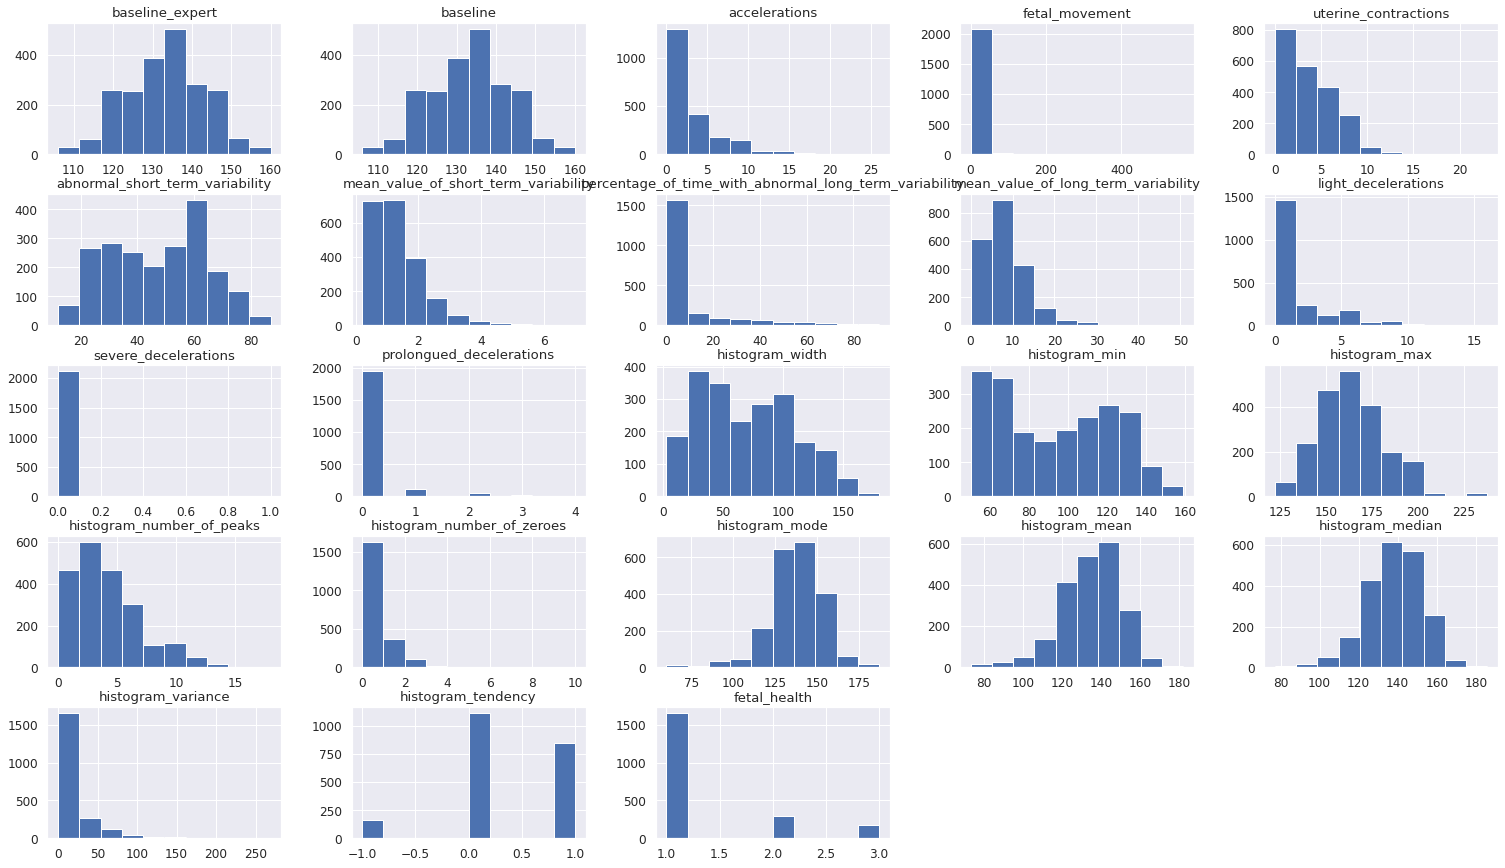

In [ ]:
#Plotting Histograms of each attribute
plt.rcParams["figure.figsize"] = (26, 15) 
df.hist() 

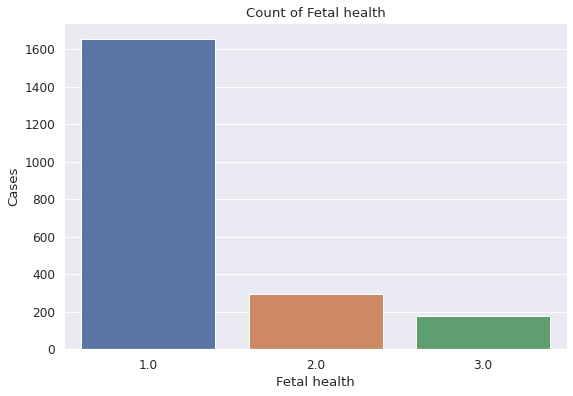

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (9,6))
cp = sns.countplot(x="fetal_health", data = df)
plt.title("Count of Fetal health")
plt.xlabel("Fetal health")
plt.ylabel("Cases")
plt.show()

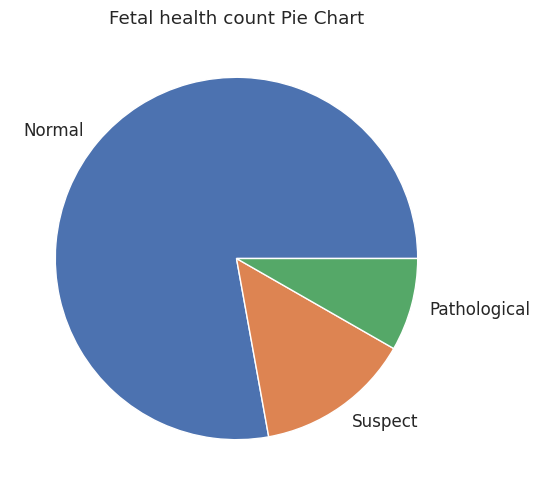

In [ ]:
normal = 1655
suspect = 295
pathological = 176
fig = plt.figure(figsize = (9,6), dpi = 100)
vis_pie_fetal_health = plt.pie([normal, suspect, pathological], labels=["Normal", "Suspect", "Pathological"])

plt.title("Fetal health count Pie Chart")
fig.savefig('Fetal Health Pie Chart.png', bbox_inches= 'tight', pad_inches = 0.5)

In [ ]:
corr = df.corr()
corr

,baseline_expert,baseline,accelerations,fetal_movement,uterine_contractions,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,light_decelerations,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
baseline_expert,1.000000,1.000000,-0.077967,-0.033305,-0.127722,0.305570,-0.279607,0.285630,-0.032091,-0.155908,...,0.361619,0.275110,-0.113933,-0.004745,0.708993,0.723121,0.789246,-0.133938,0.293503,0.148151
baseline,1.000000,1.000000,-0.077967,-0.033305,-0.127722,0.305570,-0.279607,0.285630,-0.032091,-0.155908,...,0.361619,0.275110,-0.113933,-0.004745,0.708993,0.723121,0.789246,-0.133938,0.293503,0.148151
accelerations,-0.077967,-0.077967,1.000000,0.053956,0.212100,-0.197985,0.191378,-0.345162,-0.128901,-0.011350,...,-0.157447,0.373493,0.191475,-0.011430,0.221693,0.236811,0.250729,0.111981,0.032235,-0.340394
fetal_movement,-0.033305,-0.033305,0.053956,1.000000,-0.036626,-0.116461,0.138061,-0.072214,0.021031,0.076283,...,-0.158422,0.111228,0.183904,-0.014632,-0.037492,-0.085718,-0.056281,0.177793,-0.000069,0.060366
uterine_contractions,-0.127722,-0.127722,0.212100,-0.036626,1.000000,-0.079651,0.232687,-0.247513,-0.106590,0.339484,...,-0.112597,0.146645,0.095512,0.022701,-0.077695,-0.169739,-0.111041,0.184188,-0.060995,-0.163295
abnormal_short_term_variability,0.305570,0.305570,-0.197985,-0.116461,-0.079651,1.000000,-0.430705,0.459413,-0.315105,-0.037040,...,0.275378,-0.111806,-0.167561,-0.149296,0.058363,0.074554,0.119960,-0.146434,-0.005748,0.471191
mean_value_of_short_term_variability,-0.279607,-0.279607,0.191378,0.138061,0.232687,-0.430705,1.000000,-0.470259,0.073892,0.516901,...,-0.622569,0.409072,0.501430,0.266183,-0.307586,-0.445401,-0.336109,0.555852,-0.066140,-0.103382
percentage_of_time_with_abnormal_long_term_variability,0.285630,0.285630,-0.345162,-0.072214,-0.247513,0.459413,-0.470259,1.000000,-0.171114,-0.266298,...,0.422834,-0.283183,-0.279301,-0.121784,0.165211,0.222321,0.186480,-0.281536,0.042481,0.426146
mean_value_of_long_term_variability,-0.032091,-0.032091,-0.128901,0.021031,-0.106590,-0.315105,0.073892,-0.171114,1.000000,-0.251442,...,-0.144976,0.002023,0.056357,0.123869,0.072071,0.137813,0.063228,-0.164079,0.153093,-0.226797
light_decelerations,-0.155908,-0.155908,-0.011350,0.076283,0.339484,-0.037040,0.516901,-0.266298,-0.251442,1.000000,...,-0.539125,0.242187,0.393860,0.208487,-0.315463,-0.509446,-0.353878,0.515130,-0.000687,0.065328


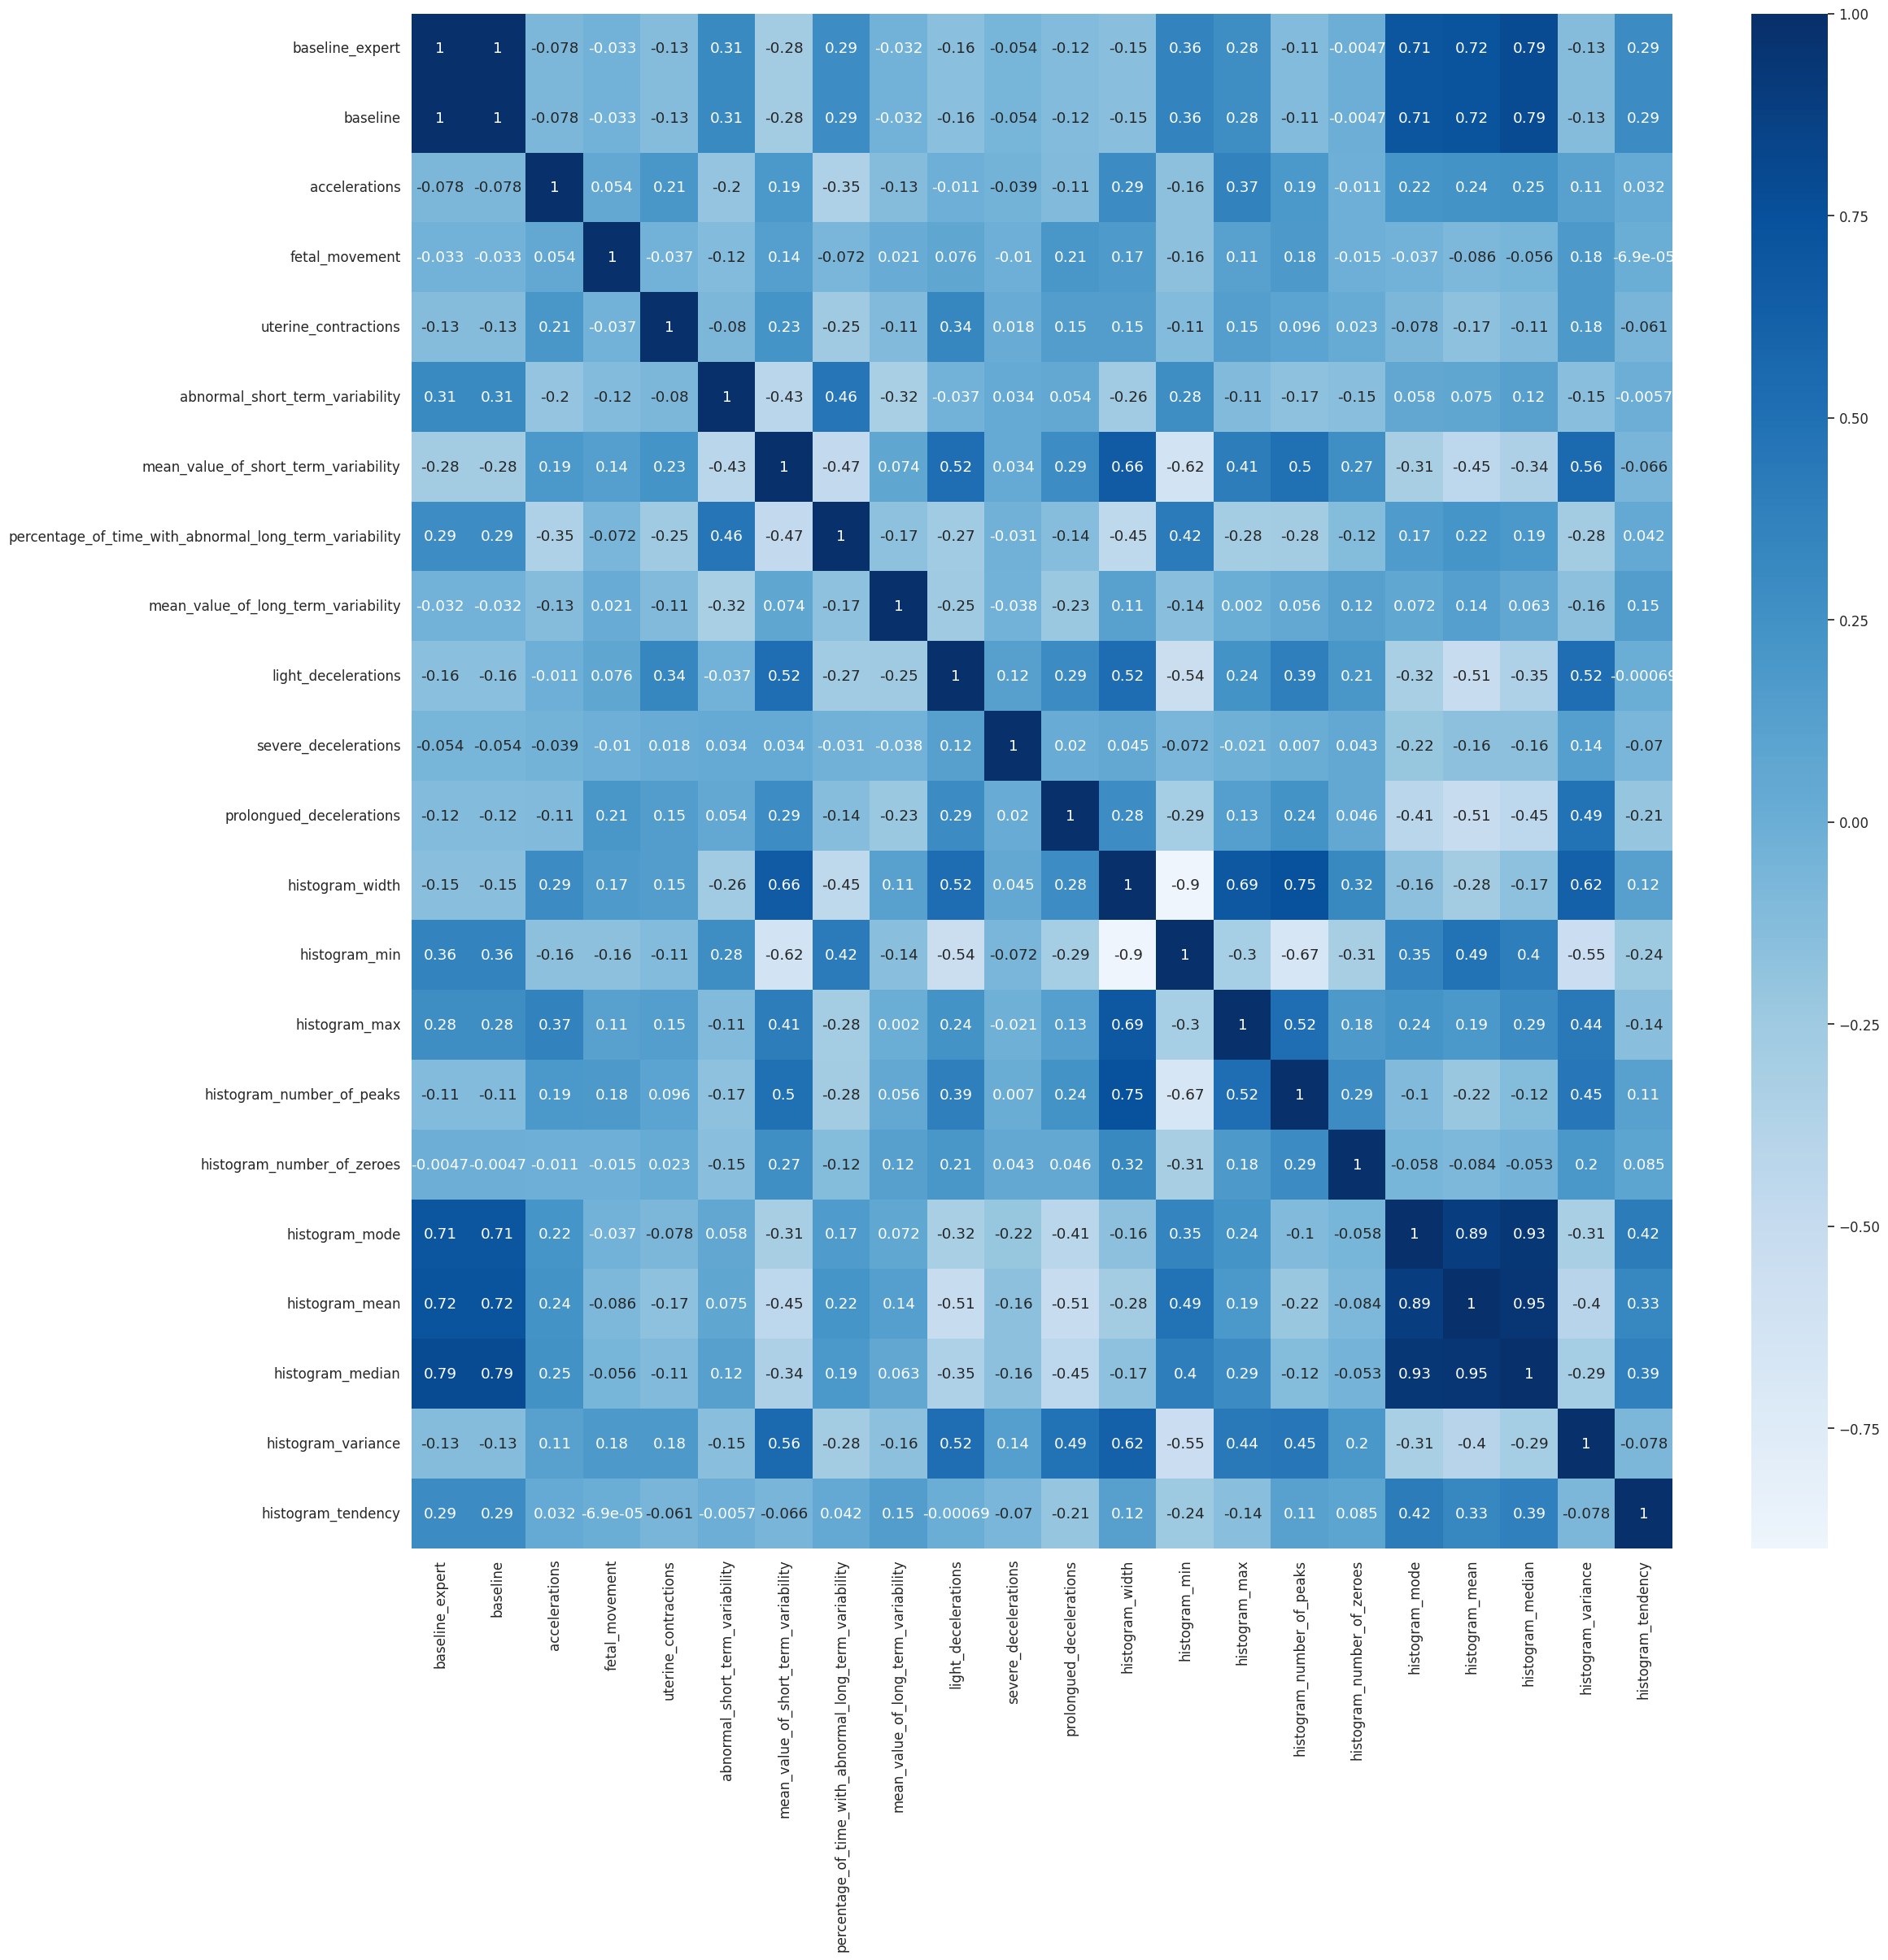

In [ ]:
fig = plt.figure(figsize=(25,25), dpi = 100)
sns.heatmap(X.corr(),xticklabels = X.corr().columns, yticklabels = X.corr().columns, cmap = 'Blues', annot = True, center = 0)

In [ ]:
#Dropping baseline_expert, histogram_width, histogram_mode, histogram_median as they are highly correlated variables
X = X.drop(columns=["baseline_expert","histogram_width","histogram_median"])

In [ ]:
#Scaling the input
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X)
X_scaled=pd.DataFrame(sc.transform(X),columns=X.columns)
X_scaled

,baseline,accelerations,fetal_movement,uterine_contractions,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,light_decelerations,severe_decelerations,prolongued_decelerations,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_variance,histogram_tendency
0,-1.352220,-0.764740,-0.195096,-1.285798,1.513190,-0.943095,1.802542,-1.028560,-0.628375,-0.057476,-0.27153,-1.068562,-2.119592,-0.701397,-0.458444,-1.065614,0.153270,1.870569,1.112980
1,-0.132526,0.358852,-0.195096,0.119475,-1.744751,0.868841,-0.535361,0.393176,0.172060,-0.057476,-0.27153,-0.865539,1.893794,0.655137,0.958201,0.216638,0.089126,-0.234998,-0.524526
2,-0.030884,-0.202944,-0.195096,0.470793,-1.802928,0.868841,-0.535361,0.926327,0.172060,-0.057476,-0.27153,-0.865539,1.893794,0.316003,0.958201,0.216638,0.024982,-0.200481,-0.524526
3,0.070757,-0.202944,-0.195096,0.822111,-1.802928,1.208579,-0.535361,2.632411,0.172060,-0.057476,-0.27153,-1.373097,0.333033,2.350804,-0.458444,-0.027600,-0.039162,-0.200481,1.112980
4,-0.132526,0.358852,-0.195096,0.470793,-1.802928,1.208579,-0.535361,2.081488,-0.628375,-0.057476,-0.27153,-1.373097,0.333033,1.672537,-0.458444,-0.027600,0.089126,-0.269516,1.112980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,0.680604,-0.764740,-0.195096,0.822111,1.862255,-1.282833,0.823885,-0.175519,-0.628375,-0.057476,-0.27153,1.469229,0.723223,-0.023130,-0.458444,0.949354,0.987141,-0.580173,-0.524526
2122,0.680604,-0.483842,-0.195096,1.876065,1.804078,-1.056341,0.660775,-0.193290,-0.628375,-0.057476,-0.27153,0.318764,0.277292,0.655137,-0.458444,0.888294,0.858853,-0.545656,1.112980
2123,0.680604,-0.483842,-0.195096,1.173429,1.862255,-1.056341,0.552035,-0.371007,-0.628375,-0.057476,-0.27153,0.318764,0.333033,0.316003,-0.458444,0.949354,0.858853,-0.511138,1.112980
2124,0.680604,-0.483842,-0.195096,1.876065,1.804078,-1.056341,0.932624,-0.211062,-0.628375,-0.057476,-0.27153,0.318764,0.277292,0.655137,-0.458444,0.888294,0.794709,-0.511138,1.112980


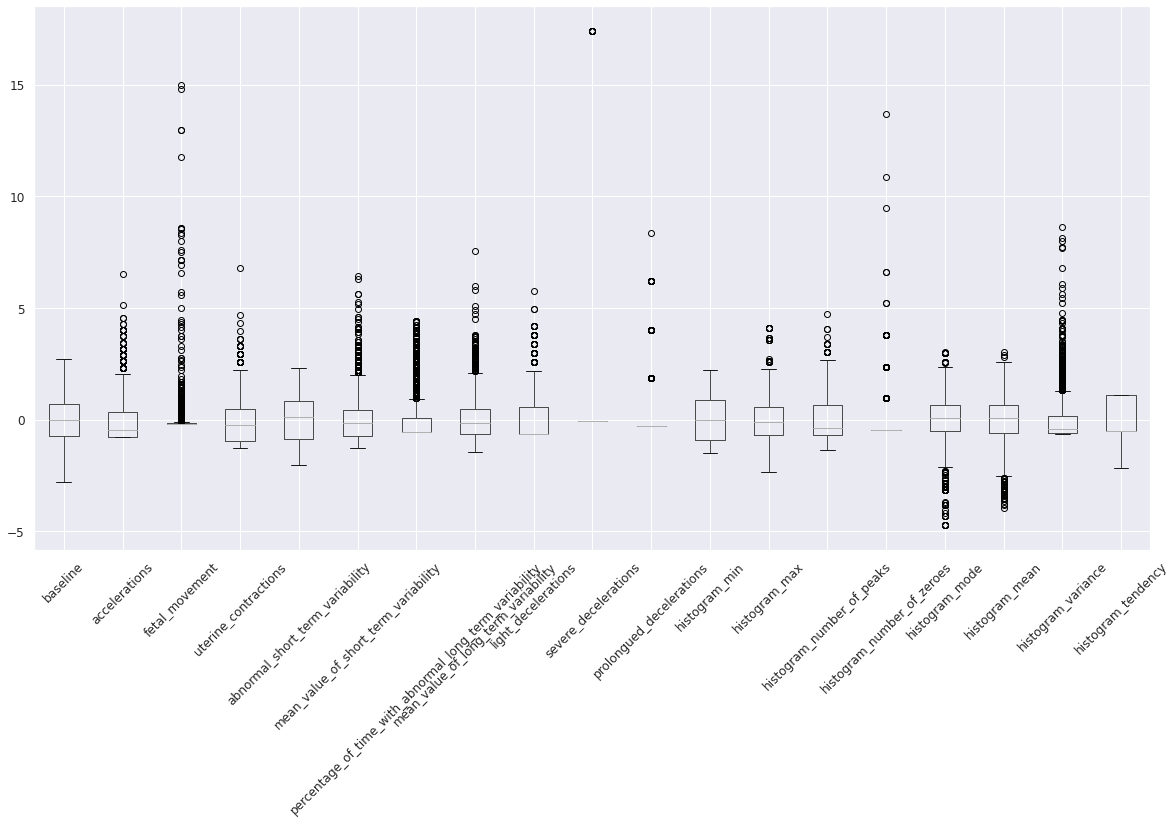

In [ ]:
# Creating Box Plots to Remove Outliers
import sklearn
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
X_scaled.boxplot(ax=ax, rot=45)
plt.show()

In [ ]:
# Removing Outliers and Inserting NULL
cols=X_scaled.columns
for i in X_scaled.columns:  
  for j in range(0,len(X_scaled[i])):
    if(X_scaled[i][j]>=5):
      X_scaled[i][j]=np.nan
      # print(X[i][j])
X_scaled.isnull().sum() 

baseline                                                   0
accelerations                                              2
fetal_movement                                            21
uterine_contractions                                       1
abnormal_short_term_variability                            0
mean_value_of_short_term_variability                       6
percentage_of_time_with_abnormal_long_term_variability     0
mean_value_of_long_term_variability                        4
light_decelerations                                        1
severe_decelerations                                       7
prolongued_decelerations                                  20
histogram_min                                              0
histogram_max                                              0
histogram_number_of_peaks                                  0
histogram_number_of_zeroes                                 7
histogram_mode                                             0
histogram_mean          

In [ ]:
#Predicting these values using KKN Imputer
from sklearn.impute import KNNImputer
X_knn=X_scaled
X_knn=KNNImputer(n_neighbors=5).fit_transform(X_knn)
X_knn=pd.DataFrame(X_knn,columns=X.columns)
X_knn

,baseline,accelerations,fetal_movement,uterine_contractions,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,light_decelerations,severe_decelerations,prolongued_decelerations,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_variance,histogram_tendency
0,-1.352220,-0.764740,-0.195096,-1.285798,1.513190,-0.943095,1.802542,-1.028560,-0.628375,-0.057476,-0.27153,-1.068562,-2.119592,-0.701397,-0.458444,-1.065614,0.153270,1.870569,1.112980
1,-0.132526,0.358852,-0.195096,0.119475,-1.744751,0.868841,-0.535361,0.393176,0.172060,-0.057476,-0.27153,-0.865539,1.893794,0.655137,0.958201,0.216638,0.089126,-0.234998,-0.524526
2,-0.030884,-0.202944,-0.195096,0.470793,-1.802928,0.868841,-0.535361,0.926327,0.172060,-0.057476,-0.27153,-0.865539,1.893794,0.316003,0.958201,0.216638,0.024982,-0.200481,-0.524526
3,0.070757,-0.202944,-0.195096,0.822111,-1.802928,1.208579,-0.535361,2.632411,0.172060,-0.057476,-0.27153,-1.373097,0.333033,2.350804,-0.458444,-0.027600,-0.039162,-0.200481,1.112980
4,-0.132526,0.358852,-0.195096,0.470793,-1.802928,1.208579,-0.535361,2.081488,-0.628375,-0.057476,-0.27153,-1.373097,0.333033,1.672537,-0.458444,-0.027600,0.089126,-0.269516,1.112980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,0.680604,-0.764740,-0.195096,0.822111,1.862255,-1.282833,0.823885,-0.175519,-0.628375,-0.057476,-0.27153,1.469229,0.723223,-0.023130,-0.458444,0.949354,0.987141,-0.580173,-0.524526
2122,0.680604,-0.483842,-0.195096,1.876065,1.804078,-1.056341,0.660775,-0.193290,-0.628375,-0.057476,-0.27153,0.318764,0.277292,0.655137,-0.458444,0.888294,0.858853,-0.545656,1.112980
2123,0.680604,-0.483842,-0.195096,1.173429,1.862255,-1.056341,0.552035,-0.371007,-0.628375,-0.057476,-0.27153,0.318764,0.333033,0.316003,-0.458444,0.949354,0.858853,-0.511138,1.112980
2124,0.680604,-0.483842,-0.195096,1.876065,1.804078,-1.056341,0.932624,-0.211062,-0.628375,-0.057476,-0.27153,0.318764,0.277292,0.655137,-0.458444,0.888294,0.794709,-0.511138,1.112980


In [ ]:
X_knn.isnull().sum() 

baseline                                                  0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                                            0
histogram_mean                          

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


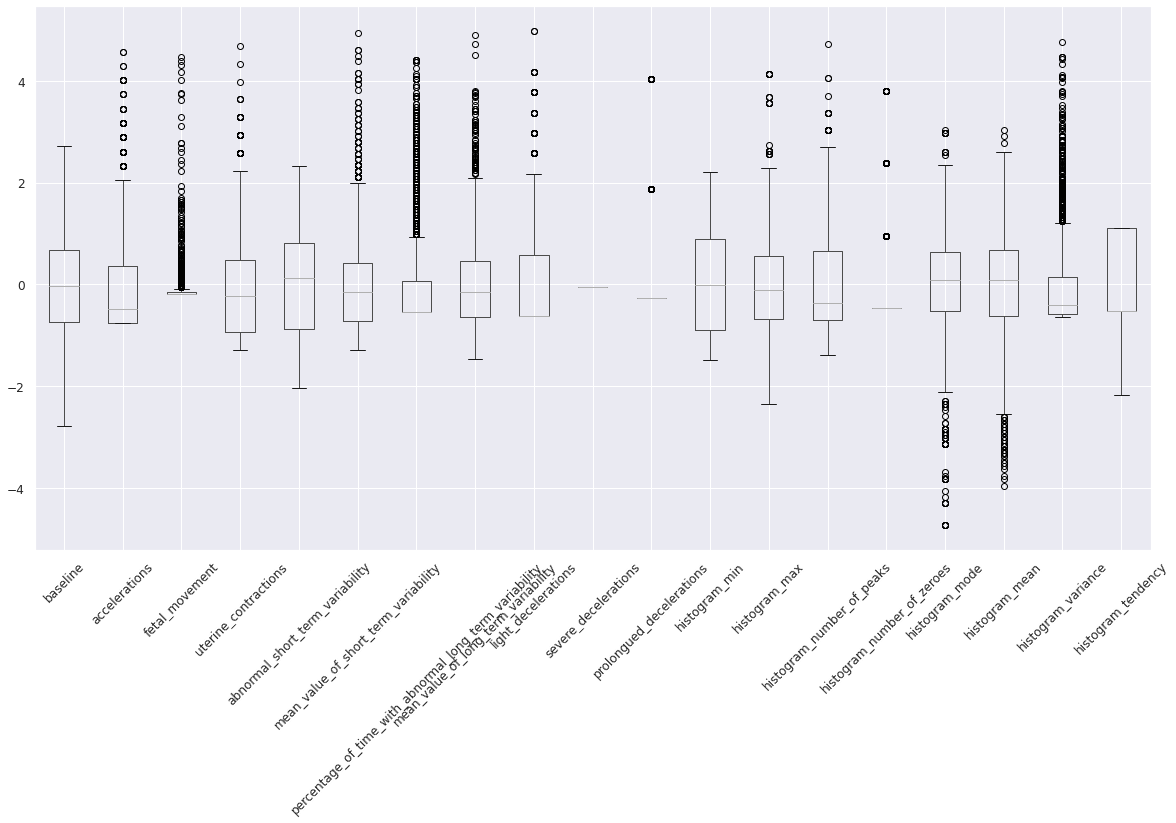

In [ ]:
import sklearn
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
X_scaled.boxplot(ax=ax, rot=45)
plt.show()

In [ ]:
X=X_knn
X

,baseline,accelerations,fetal_movement,uterine_contractions,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,light_decelerations,severe_decelerations,prolongued_decelerations,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_variance,histogram_tendency
0,-1.352220,-0.764740,-0.195096,-1.285798,1.513190,-0.943095,1.802542,-1.028560,-0.628375,-0.057476,-0.27153,-1.068562,-2.119592,-0.701397,-0.458444,-1.065614,0.153270,1.870569,1.112980
1,-0.132526,0.358852,-0.195096,0.119475,-1.744751,0.868841,-0.535361,0.393176,0.172060,-0.057476,-0.27153,-0.865539,1.893794,0.655137,0.958201,0.216638,0.089126,-0.234998,-0.524526
2,-0.030884,-0.202944,-0.195096,0.470793,-1.802928,0.868841,-0.535361,0.926327,0.172060,-0.057476,-0.27153,-0.865539,1.893794,0.316003,0.958201,0.216638,0.024982,-0.200481,-0.524526
3,0.070757,-0.202944,-0.195096,0.822111,-1.802928,1.208579,-0.535361,2.632411,0.172060,-0.057476,-0.27153,-1.373097,0.333033,2.350804,-0.458444,-0.027600,-0.039162,-0.200481,1.112980
4,-0.132526,0.358852,-0.195096,0.470793,-1.802928,1.208579,-0.535361,2.081488,-0.628375,-0.057476,-0.27153,-1.373097,0.333033,1.672537,-0.458444,-0.027600,0.089126,-0.269516,1.112980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,0.680604,-0.764740,-0.195096,0.822111,1.862255,-1.282833,0.823885,-0.175519,-0.628375,-0.057476,-0.27153,1.469229,0.723223,-0.023130,-0.458444,0.949354,0.987141,-0.580173,-0.524526
2122,0.680604,-0.483842,-0.195096,1.876065,1.804078,-1.056341,0.660775,-0.193290,-0.628375,-0.057476,-0.27153,0.318764,0.277292,0.655137,-0.458444,0.888294,0.858853,-0.545656,1.112980
2123,0.680604,-0.483842,-0.195096,1.173429,1.862255,-1.056341,0.552035,-0.371007,-0.628375,-0.057476,-0.27153,0.318764,0.333033,0.316003,-0.458444,0.949354,0.858853,-0.511138,1.112980
2124,0.680604,-0.483842,-0.195096,1.876065,1.804078,-1.056341,0.932624,-0.211062,-0.628375,-0.057476,-0.27153,0.318764,0.277292,0.655137,-0.458444,0.888294,0.794709,-0.511138,1.112980


In [ ]:
Y=np.ravel(Y)

**Training and Testing with Different Models**


In [339]:
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

# Using F1 not accuracy as accuracy is largerly contributed by correct predictions (correct/total) while F1 is more related to false positives and false negatives 
# Using macro F1 score as it gives equal importance to each class, and not letting classes having more observations have more impact in final score like in the case of micro

1) Logistic Regression

In [315]:
logistic_regression = linear_model.LogisticRegression(max_iter=500)  #Got Best F1 Score at these number of Iterations

In [316]:
cross_val_score(logistic_regression,X,Y,cv=10,scoring='f1_macro').mean()

0.7466494605423112

2) Naive Bayes

In [317]:
gauss_naiveBayes = GaussianNB()

In [318]:
cross_val_score(gauss_naiveBayes,X,Y,cv=10,scoring='f1_macro').mean()

0.6670831980174784

3) Random Forest

In [319]:
random_forest = RandomForestClassifier(n_estimators=50,criterion="gini")   #gini requires less computation time

In [320]:
cross_val_score(random_forest,X,Y,cv=10,scoring='f1_macro').mean()

0.8105121101505259

4) Ada Boost

In [323]:
booster = AdaBoostClassifier(random_state=100)

In [324]:
cross_val_score(booster,X,Y,cv=10,scoring='f1_macro').mean()

0.7577579391511267

5) ANN

In [325]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest= train_test_split(X,Y,test_size=0.1,random_state=100)
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(1913, 19)
(213, 19)
(1913,)
(213,)


In [345]:
ANN_model = MLPClassifier(hidden_layer_sizes=(256, 32, 8), random_state=1234)
ANN_model.fit(xtrain, ytrain)

MLPClassifier(hidden_layer_sizes=(256, 32, 8), random_state=1234)

In [346]:
ypred=ANN_model.predict(xtest)
print(ypred)

[1. 1. 2. 1. 1. 1. 2. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 3. 1. 1. 1. 1. 1. 3.
 2. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 3. 2. 3. 1. 1. 1. 1. 1. 2. 1. 1. 2.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 3. 1. 2. 1. 1. 1. 2. 1.
 2. 1. 3. 1. 1. 3. 2. 2. 1. 1. 1. 3. 1. 1. 1. 1. 1. 1. 1. 3. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 3. 1. 3. 1. 1. 3. 3. 1. 3. 1. 1. 1. 1. 1. 1. 1. 1. 3.
 1. 1. 1. 2. 3. 1. 1. 1. 1. 1. 1. 3. 1. 1. 1. 2. 1. 1. 3. 1. 1. 2. 1. 1.
 3. 1. 1. 1. 1. 1. 1. 3. 3. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 2. 1. 2. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1.]


In [347]:
from sklearn.metrics import f1_score
f1_score(ytest,ypred, average='macro')

0.8120122534826715

In [270]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

         1.0       0.93      0.96      0.94       166
         2.0       0.67      0.56      0.61        25
         3.0       0.90      0.86      0.88        22

    accuracy                           0.90       213
   macro avg       0.83      0.79      0.81       213
weighted avg       0.90      0.90      0.90       213



In [271]:
multilabel_confusion_matrix(ytest, ypred)

array([[[ 35,  12],
        [  7, 159]],

       [[181,   7],
        [ 11,  14]],

       [[189,   2],
        [  3,  19]]])

6) SVM

In [329]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest= train_test_split(X,Y,test_size=0.1,random_state=100)
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(1913, 19)
(213, 19)
(1913,)
(213,)


In [330]:
# Finding best gamma and c

C_grid = 0.02*np.arange(1,100,10)
gamma_grid = 0.02*np.arange(1,50,5)
print(C_grid,gamma_grid)

parameters = {'C': C_grid, 'gamma' : gamma_grid}
gridCV = GridSearchCV(SVC(), parameters, n_jobs=-1)             
gridCV.fit(xtrain,ytrain)

best_C = gridCV.best_params_['C']
best_gamma = gridCV.best_params_['gamma']

[0.02 0.22 0.42 0.62 0.82 1.02 1.22 1.42 1.62 1.82] [0.02 0.12 0.22 0.32 0.42 0.52 0.62 0.72 0.82 0.92]


In [331]:
print("Best C "+str(best_C))
print("Best Gamma "+str(best_gamma))

Best C 1.82
Best Gamma 0.12


In [350]:
lin = SVC(kernel='linear',C=best_C,gamma=best_gamma)
# lin.fit(xtrain, ytrain)
cross_val_score(lin,X,Y,cv=10,scoring='f1_macro').mean()

0.7255858626243172

In [349]:
rbf = SVC(kernel='rbf',C=best_C,gamma=best_gamma)
# rbf.fit(xtrain, ytrain)
cross_val_score(rbf,X,Y,cv=10,scoring='f1_macro').mean()

0.7356431337318596

In [348]:
poly = SVC(kernel='poly',degree=3, C=best_C,gamma=best_gamma )
# poly.fit(xtrain, ytrain)
cross_val_score(poly,X,Y,cv=10,scoring='f1_macro').mean()

0.7423645944297768

7) KNN

In [340]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest= train_test_split(X,Y,test_size=0.1,random_state=100)
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(1913, 19)
(213, 19)
(1913,)
(213,)


In [343]:
model = KNeighborsClassifier(n_neighbors=3)
cross_val_score(model,X,Y,cv=10,scoring='f1_macro').mean()

0.704785050457599